In [1]:
from random import randint
from math import sqrt

def sq_dist(p,q):
    return pow(p[0] - q[0],2) +pow(p[1]- q[1],2)

def linear_search(points,query):
    neighbor_sqd =float("inf")
    for point in points:
        d= sq_dist(point,query)
        if d<neighbor_sqd:
            neighbor= point
            neighbor_sqd=d
    return neighbor

def neighbor_index(points,query):
    return points.index(linear_search(points,query))

def standardize(data):
    mx= sum([d[0] for d in data]) / len(data)
    my= sum([d[1] for d in data]) / len(data)
    sdx= sqrt(sum([pow((d[0]-mx),2) for d in data])/len(data))
    sdy= sqrt(sum([pow((d[1]-mx),2) for d in data])/len(data))
    return [((d[0]-mx)/sdx,(d[1]-my)/sdy) for d in data]

In [2]:
def clustering(data,k,classification):
    centroids =[]
    for c in range(k):
        members =[i for i in range(len(data)) if classification[i] == c]
        if len(members) > 0:
            sumx =sum([data[i][0] for i in members])
            sumy =sum([data[i][1] for i in members])
            centroids.append((sumx /len(members),sumy /len(members)))
    return centroids
        

In [3]:
def k_means(data,k):
    temporary = [randint(0, k - 1) for i in range(len(data))]
    classification =[]
    while classification != temporary :
        classification =temporary
        centroids =clustering(data, k, classification)
        temporary =[neighbor_index(centroids,d)for d in data]
    return classification

In [4]:
data =[(randint(0,100),randint(0,200)) for i in range(50)]
k_means(standardize(data),5)

[3,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 1,
 4,
 1,
 4,
 3,
 4,
 0,
 4,
 2,
 3,
 4,
 2,
 0,
 0,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 4,
 4,
 0,
 4,
 0,
 3,
 0,
 2,
 2]

In [5]:
data

[(16, 155),
 (60, 106),
 (79, 21),
 (11, 155),
 (34, 56),
 (12, 157),
 (32, 137),
 (55, 171),
 (73, 133),
 (24, 41),
 (75, 12),
 (27, 66),
 (17, 150),
 (15, 51),
 (56, 175),
 (11, 14),
 (55, 47),
 (1, 163),
 (24, 79),
 (31, 7),
 (44, 193),
 (39, 136),
 (14, 87),
 (87, 4),
 (66, 110),
 (90, 144),
 (84, 48),
 (42, 40),
 (53, 10),
 (99, 119),
 (55, 17),
 (93, 75),
 (82, 154),
 (67, 159),
 (48, 148),
 (79, 161),
 (64, 1),
 (93, 172),
 (39, 127),
 (69, 52),
 (77, 26),
 (6, 43),
 (24, 101),
 (51, 144),
 (10, 79),
 (35, 152),
 (24, 154),
 (61, 112),
 (46, 80),
 (30, 18)]

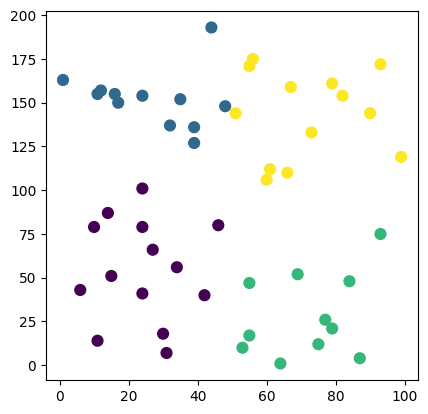

In [11]:
assignment =k_means(standardize(data),5)

import matplotlib
import matplotlib.pyplot as plt

fig =plt.figure(figsize =matplotlib.figure.figaspect(1))
plt.clf()
ax =fig.add_subplot(1,1,1)
ax.scatter([d[0] for d in data], [d[1] for d in data],s=60 ,c =assignment)
plt.show()